In [1]:
import numpy as np

m = 100
noise = np.random.rand(m, 1)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + noise

In [2]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def make_ridge_regressor(alpha, degree=1):
    ridge_regressor = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha, solver='cholesky')),
    ])
    return ridge_regressor

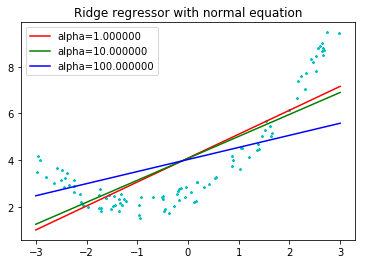

In [7]:
import matplotlib.pyplot as plt

plt.figure('Ridge regressor with normal equation')
plt.title('Ridge regressor with normal equation')
plt.scatter(X, y, c='c', s=5.0, marker='*')

for alpha, color in zip([1, 10, 100], ['r', 'g', 'b']):
    ridge_regressor = make_ridge_regressor(alpha)
    ridge_regressor.fit(X, y)
    x = np.linspace(-3.0, 3.0, 100).reshape((-1, 1))
    y_pred = ridge_regressor.predict(x)
    plt.plot(x, y_pred, color=color, label='alpha=%f'%alpha)

plt.legend()
plt.show()

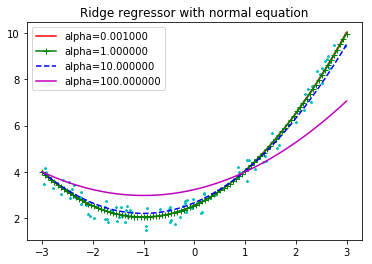

In [4]:
plt.figure('Ridge regressor with normal equation')
plt.title('Ridge regressor with normal equation')
plt.scatter(X, y, c='c', s=5.0, marker='*')

for alpha, color in zip([1e-3, 1, 10, 100], ['r-', 'g-+', 'b--', 'm']):
    ridge_regressor = make_ridge_regressor(alpha, degree=2)
    ridge_regressor.fit(X, y)
    x = np.linspace(-3.0, 3.0, 100).reshape((-1, 1))
    y_pred = ridge_regressor.predict(x)
    plt.plot(x, y_pred, color, label='alpha=%f'%alpha)

plt.legend()
plt.show()

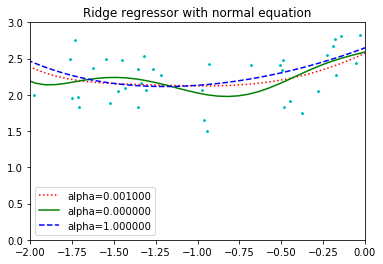

In [5]:
plt.figure('Ridge regressor with normal equation')
plt.title('Ridge regressor with normal equation')
plt.scatter(X, y, c='c', s=5.0, marker='*')

for alpha, color in zip([1e-3, 0, 1], ['r:', 'g', 'b--']):
    ridge_regressor = make_ridge_regressor(alpha, degree=20)
    ridge_regressor.fit(X, y)
    x = np.linspace(-3.0, 3.0, 100).reshape((-1, 1))
    y_pred = ridge_regressor.predict(x)
    plt.plot(x, y_pred, color, label='alpha=%f'%alpha)

plt.xlim([-2, 0])
plt.ylim([0, 3])
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import SGDRegressor

def make_sgd_regressor(alpha, degree=1):
    sgd_regressor = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('std_scaler', StandardScaler()),
        ('sgd_regressor', SGDRegressor(max_iter=5, tol=1e-3, penalty='l2', alpha=alpha))
    ])
    return sgd_regressor

/Users/guhwanbae/anaconda3/envs/gu-keras/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/guhwanbae/anaconda3/envs/gu-keras/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1229: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/guhwanbae/anaconda3/envs/gu-keras/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/guhwanbae/anaconda3/envs/gu-keras/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1229: ConvergenceWarning: Maximum numbe

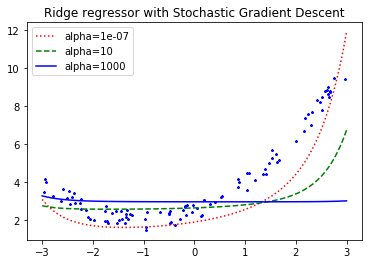

In [21]:
plt.figure('Ridge regressor with Stochastic Gradient Descent')
plt.title('Ridge regressor with Stochastic Gradient Descent')
plt.scatter(X, y, c='b', s=5.0, marker='*')

for alpha, color in zip([1e-7, 10, 1000], ['r:','g--', 'b']):
    sgd_regressor = make_sgd_regressor(alpha, degree=10)
    sgd_regressor.fit(X, y)
    x = np.linspace(-3.0, 3.0, 100).reshape((-1, 1))
    y_pred = sgd_regressor.predict(x)
    plt.plot(x, y_pred, color, label='alpha='+str(alpha))

plt.legend()
plt.show()